In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. One-hot encode labels
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)


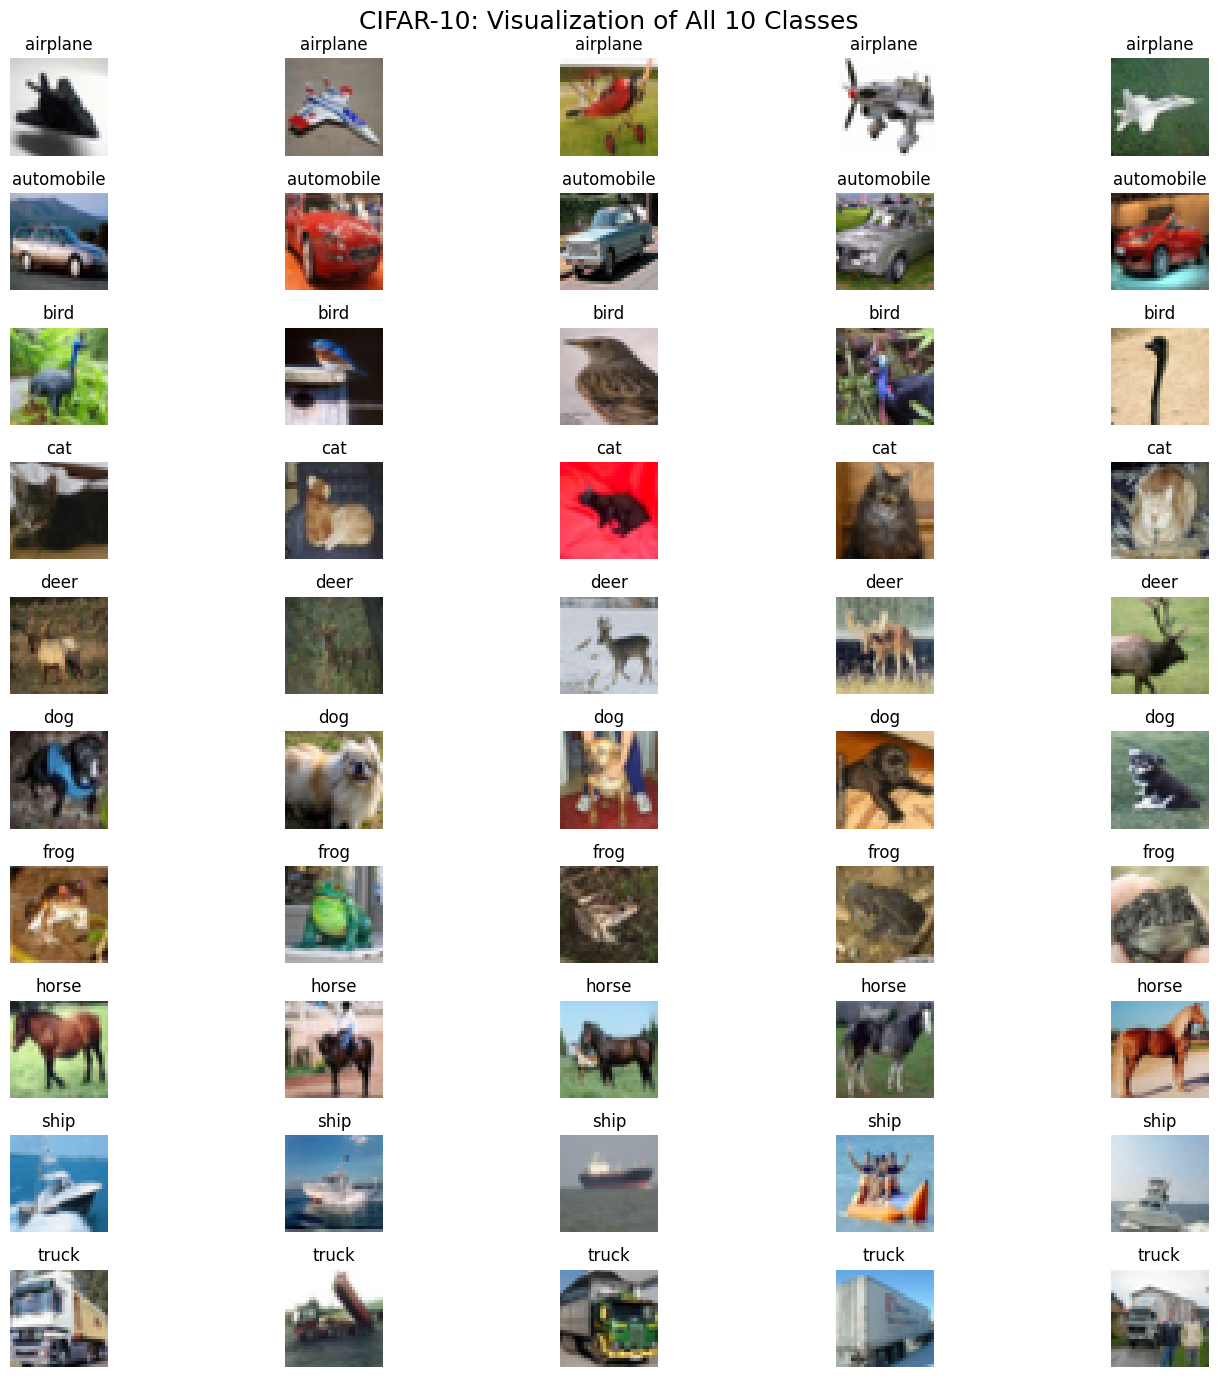

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
selected_classes = list(range(10))  # 0 to 9

plt.figure(figsize=(15, 14))

# Plot 5 images for each of the 10 selected classes
for class_index, class_label in enumerate(selected_classes):
    # Find indices where the true label (y_train) matches the current class
    indices = np.where(y_train == class_label)[0]
    for i in range(5):
        plt.subplot(10, 5, class_index * 5 + i + 1)
        plt.imshow(X_train[indices[i]])
        plt.title(class_names[class_index])
        plt.axis('off')

plt.suptitle("CIFAR-10: Visualization of All 10 Classes", fontsize=18)
plt.tight_layout()
plt.show()

In [10]:
model= Sequential()
# flatten the image into 1D vector (3072)
model.add(Flatten(input_shape=(32,32,3)))
# first hidden layer
model.add(Dense(512,activation = 'relu'))
# output layer
model.add(Dense(10,activation ='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
model.fit(X_train, y_train_oh, epochs=3, batch_size=64)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.2829 - loss: 2.1317
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.3891 - loss: 1.7191
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4186 - loss: 1.6403


In [15]:
model.evaluate(X_test, y_test_oh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4239 - loss: 1.5862


[1.5909711122512817, 0.42660000920295715]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


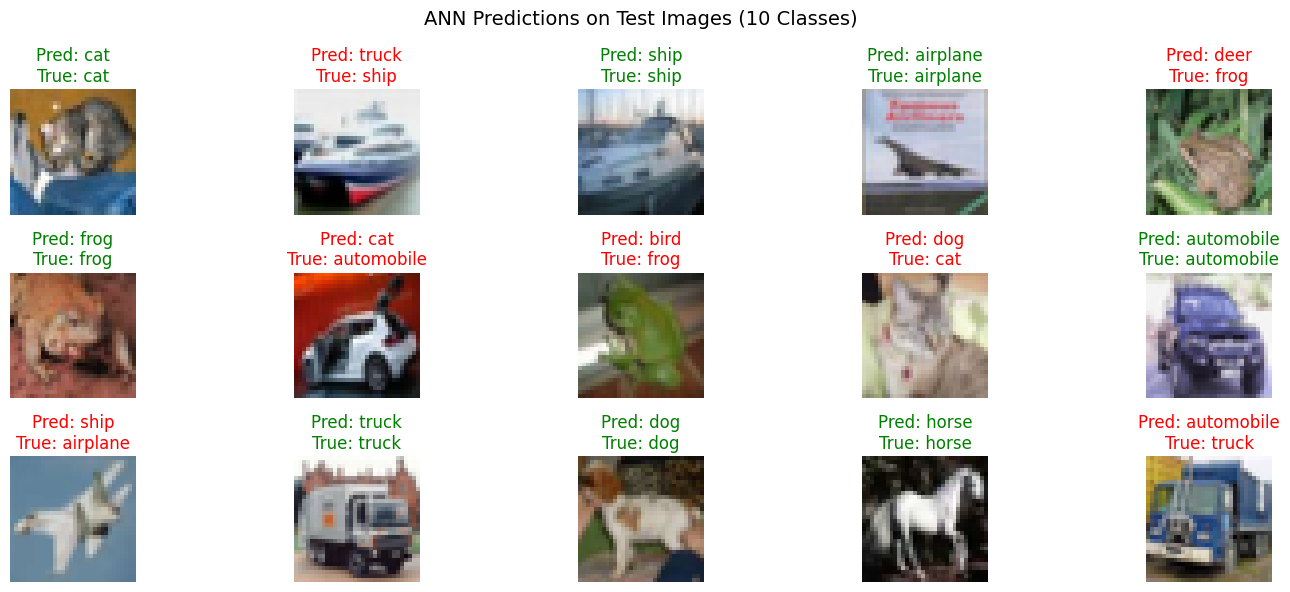

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on first 10 test images
pred_probs = model.predict(X_test[:15])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_oh[:15], axis=1)

# Class labels for all 10 CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot predictions with color-coded titles
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color="green" if pred_classes[i] == true_classes[i] else "red")
    plt.axis('off')

plt.suptitle("ANN Predictions on Test Images (10 Classes)", fontsize=14)
plt.tight_layout()
plt.show()
